In [105]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [106]:
def plot_data2(d, ax):
  #computet the mean
  curve_mean = d['data'].mean(axis = 0)
  #compute the 2 * std
  curve_std = 2*d['data'].std(axis = 0)
  # fill the space to show std
  ax.fill_between(
      x = noise_amplitude,
      y1 = curve_mean - curve_std,
      y2 = curve_mean + curve_std,
      alpha = 0.1,
      color = d['color']
  )
  #plot the mean
  pt = ax.plot(noise_amplitude, curve_mean, "o-", c = d['color'], label = d['label'] )
  return pt

In [107]:
def plot_data(d,ax):
  pt = []
  temp = ax.plot(noise_amplitude, d['data'][0], "*-", c = d['color'], label = d['label'] )
  pt.append(temp)
  if d['data'].shape[0] > 1:
    for i in range(1, d['data'].shape[0]):
      temp = ax.plot(noise_amplitude, d['data'][i], "*-", c = d['color'] )
      pt.append(temp)
  return pt

In [108]:
def import_data(path, name, attribs):
  with open(path + name, "rb") as fp:   
    temp = pickle.load(fp)
  temp = np.array(temp)
  temp2 = dict()
  temp2['name'] = name
  temp2['data'] = temp
  temp2['label'] = attribs[0]
  temp2['color'] = attribs[1]
  return temp2

# Robustness MNIST

In [109]:
#define the range of the noise explored
noise_amplitude = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
#define the names of the import files, their label on the plot and their color
files = {
    "\mnist_complex_robust_fp.txt":             ['Robust Complex',              'green'],
    "\mnist_complex_nonrobust_fp.txt":          ['Non-Robust Complex',          'blue'],
    "\mnist_real_robust_fp.txt":                ['Robust Real',                 'red'],
    "\mnist_real_nonrobust_fp.txt":             ['Non-Robust Real',             'yellow'],
    "\mnist_complex_robust_dense_fp.txt":       ['Robust Complex Dense',        'purple'],
    "\mnist_complex_robust_doublesoft_fp.txt":  ['Robust Complex Doublesoft',   'cyan'],
}

#define the path
path = r'.\results\robustness\mnist\for_plot'
#import the data
data = []
for name, att in files.items():
  data += [import_data(path, name, att)]

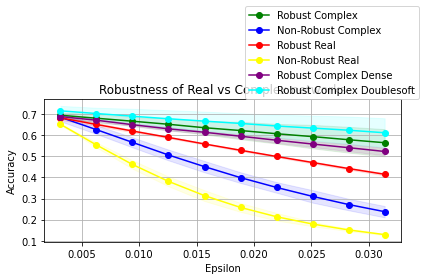

In [120]:
#make the plots
fig = plt.figure()
ax = fig.add_subplot(111)
plotted = []
for d in data:
  plotted += [plot_data2(d, ax)]
  
#add legend and axis
plt.grid()
plt.title("Robustness of Real vs Complex networks")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
ax.legend(bbox_to_anchor=(1.05, 1),
                         loc='upper right', borderaxespad=0.)
plt.tight_layout()
plt.savefig('./mnist_robustness.png')

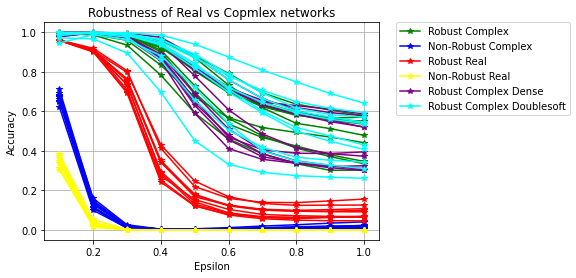

In [111]:
#same plots with lines instead
fig = plt.figure()
ax = fig.add_subplot(111)
plotted = []
for d in data:
  plotted += plot_data(d, ax)
  
#add legend and axis
plt.grid()
plt.title("Robustness of Real vs Copmlex networks")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
ax.legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.)

# Robustness CIFAR10

In [112]:
#define the range of the noise explored
noise_amplitude = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
noise_amplitude = [r*8./255. for r in noise_amplitude]

#define the names of the import files, their label on the plot and their color
files = {
    "\cifar_complex_robust_fp.txt":             ['Robust Complex',              'green'],
    "\cifar_complex_nonrobust_fp.txt":          ['Non-Robust Complex',          'blue'],
    "\cifar_real_robust_fp.txt":                ['Robust Real',                 'red'],
    "\cifar_real_nonrobust_fp.txt":             ['Non-Robust Real',             'yellow'],
    "\cifar_complex_robust_dense_fp.txt":       ['Robust Complex Dense',        'purple'],
    "\cifar_complex_robust_doublesoft_fp.txt":  ['Robust Complex Doublesoft',   'cyan'],
}

#define the path
path = r'.\results\robustness\cifar\for_plot'
#import the data
data = []
for name, att in files.items():
  data += [import_data(path, name, att)]

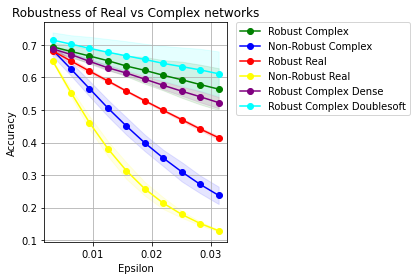

In [113]:
#make the plots
fig = plt.figure()
ax = fig.add_subplot(111)
plotted = []
for d in data:
  plotted += [plot_data2(d, ax)]
  
#add legend and axis
plt.grid()
plt.title("Robustness of Real vs Complex networks")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
ax.legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.savefig('./cifar_robustness.png')

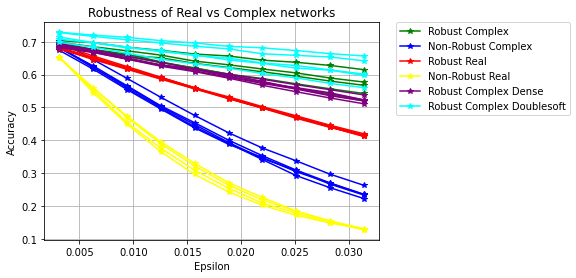

In [114]:
#same plots with lines instead
fig = plt.figure()
ax = fig.add_subplot(111)
plotted = []
for d in data:
  plotted += plot_data(d, ax)
  
#add legend and axis
plt.grid()
plt.title("Robustness of Real vs Complex networks")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
ax.legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.)

# Models comparison MNIST

In [115]:
import pandas as pd
#import restuls
with open("results.txt", "rb") as fp:   
    res = pickle.load(fp)
df = pd.DataFrame(res)
mnist_table = df[df['dataset'] == 'mnist']
cifar_table = df[df['dataset'] == 'cifar']

FileNotFoundError: [Errno 2] No such file or directory: 'results.txt'

In [ ]:
#make a readable table
mnist_table['acc_train_mean'] = mnist_table.apply(lambda x: np.array(x['metrics']['train_accuracy']).mean().round(2), axis = 1)
mnist_table['acc_train_std'] = mnist_table.apply(lambda x: np.array(x['metrics']['train_accuracy']).std().round(2), axis = 1)
mnist_table['acc_train'] = mnist_table.apply(lambda x: str(x['acc_train_mean']) + ' +/- ' + str(x['acc_train_std']), axis = 1)

mnist_table['acc_test_mean'] = mnist_table.apply(lambda x: np.array(x['metrics']['test_accuracy']).mean().round(2), axis = 1)
mnist_table['acc_test_std'] = mnist_table.apply(lambda x: np.array(x['metrics']['test_accuracy']).std().round(2), axis = 1)
mnist_table['acc_test'] = mnist_table.apply(lambda x: str(x['acc_test_mean']) + ' +/- ' + str(x['acc_test_std']), axis = 1)

mnist_table['model'] = mnist_table.apply(lambda x: np.array(x['model'][:-2]), axis = 1)

In [ ]:
mnist_table[['model', 'pooling', 'activation', 'acc_train', 'acc_test']]

In [ ]:
print(mnist_table[['model', 'pooling', 'activation', 'acc_train', 'acc_test']].to_latex())